In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = np.genfromtxt('ej-ajuste-04.txt')
x = datos[:,0]
y = datos[:,1]
Dy = datos[:,2]

(0, 7)

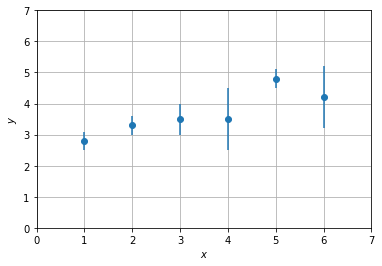

In [3]:
plt.errorbar(x,y,Dy,fmt='o')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,7)
plt.ylim(0,7)

In [4]:
b1,b0 = np.polyfit(x,y,1,w=1/Dy)
print('b0 =', b0)
print('b1 = ', b1)

b0 = 2.34204247555
b1 =  0.457131226109


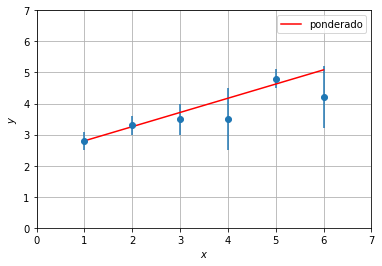

In [5]:
xx = np.linspace(1,6,100)
plt.plot(xx,b0+b1*xx, color= 'red',label='ponderado')
plt.errorbar(x,y,Dy,fmt='o')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(0,7)
plt.ylim(0,7)
plt.legend()

In [6]:
D = (np.sum(1/Dy**2))*(np.sum(x**2/Dy**2))-(np.sum(x/Dy**2))**2
s2b0 = ((np.sum(x**2/Dy**2)))/D
s2b1 = (np.sum(1/Dy**2))/D
print('s2b0 =', s2b0)
print('sb0 =', np.sqrt(s2b0)) #Error para el coeficiente de posicion, error de la desviación estándar asociada a b0
print('s2b1 =', s2b1)
print('sb1 =', np.sqrt(s2b1)) #Error para el coeficiente de posicion, error de la desviación estándar asociada a b1

s2b0 = 0.0985321800187
sb0 = 0.313898359376
s2b1 = 0.00919841553972
sb1 = 0.0959083705404


In [7]:
np.polyfit(x,y,1,w=1/Dy, cov='unscaled') #La diagonal de la segunda matriz son las soluciones, matriz de covarianza

(array([ 0.45713123,  2.34204248]), array([[ 0.0081217 , -0.02289676],
        [-0.02289676,  0.0869985 ]]))

In [8]:
from scipy.optimize import curve_fit

In [9]:
def f(x,a,b):
    return a+b*x

In [10]:
curve_fit(f,x,y,sigma=Dy)
#b0,b1

(array([ 2.34204247,  0.45713123]), array([[ 0.04349925, -0.01144838],
        [-0.01144838,  0.00406085]]))

In [13]:
curve_fit(f,x,y,sigma=Dy, absolute_sigma=True)[1] #ES más preciso


array([[ 0.09853218, -0.02593226],
       [-0.02593226,  0.00919842]])